# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [83]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'C:/9_ShareFolder/GitHub/2nd-ML100Days/data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [84]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [85]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

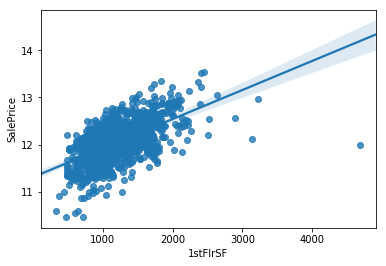

0.8444097366059928

In [19]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [86]:
df['1stFlrSF'].head(30)

0      856
1     1262
2      920
3      961
4     1145
5      796
6     1694
7     1107
8     1022
9     1077
10    1040
11    1182
12     912
13    1494
14    1253
15     854
16    1004
17    1296
18    1114
19    1339
20    1158
21    1108
22    1795
23    1060
24    1060
25    1600
26     900
27    1704
28    1600
29     520
Name: 1stFlrSF, dtype: int64

In [87]:
df['1stFlrSF'].clip(1000, 2000).head(30)

0     1000
1     1262
2     1000
3     1000
4     1145
5     1000
6     1694
7     1107
8     1022
9     1077
10    1040
11    1182
12    1000
13    1494
14    1253
15    1000
16    1004
17    1296
18    1114
19    1339
20    1158
21    1108
22    1795
23    1060
24    1060
25    1600
26    1000
27    1704
28    1600
29    1000
Name: 1stFlrSF, dtype: int64

In [76]:
df_tmp = df

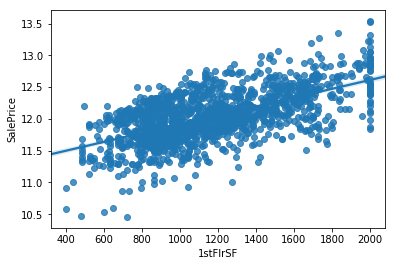

0.8776782830081219

In [49]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
# 將 GrLivArea 限制在 400 到 2000 以內, 調整離群值
df_tmp['1stFlrSF'] = df['1stFlrSF'].clip(400, 2000)
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

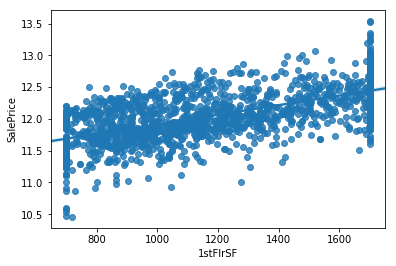

0.856939712524575

In [53]:
df_tmp['1stFlrSF'] = df['1stFlrSF'].clip(500, 2000)
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

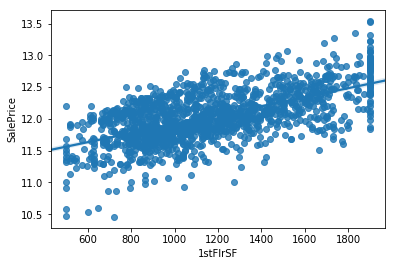

0.8724178204322545

In [50]:
df_tmp['1stFlrSF'] = df['1stFlrSF'].clip(500, 1900)
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

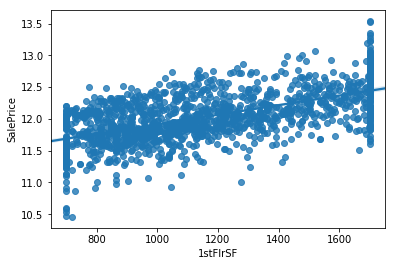

0.856939712524575

In [51]:
df_tmp['1stFlrSF'] = df['1stFlrSF'].clip(700, 1700)
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# ==>藉由調整離群值，可以提高預測準確度

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [77]:
keep_indexs = (df['1stFlrSF']> 400) & (df['1stFlrSF']< 2000)

In [67]:
keep_indexs 

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1430     True
1431     True
1432     True
1433     True
1434     True
1435     True
1436     True
1437     True
1438     True
1439     True
1440     True
1441     True
1442     True
1443     True
1444     True
1445     True
1446     True
1447     True
1448     True
1449     True
1450     True
1451     True
1452     True
1453     True
1454     True
1455     True
1456    False
1457     True
1458     True
1459     True
Name: 1stFlrSF, Length: 1460, dtype: bool

In [79]:
df_tmp = df[keep_indexs]
len(df_tmp)

1416

In [80]:
train_Y = train_Y[keep_indexs]
len(train_Y)

1416

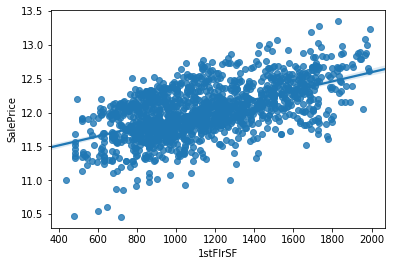

0.8852220393916757

In [81]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""
keep_indexs = (df['1stFlrSF']> 400) & (df['1stFlrSF']< 2000)
df_tmp = df[keep_indexs]
train_Y_tmp = train_Y[keep_indexs]
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y_tmp)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y_tmp, cv=5).mean()

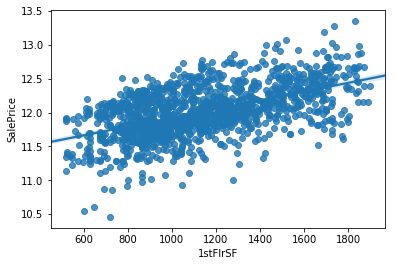

0.8815531448854882

In [82]:
keep_indexs = (df['1stFlrSF']> 500) & (df['1stFlrSF']< 1900)
df_tmp = df[keep_indexs]
train_Y_tmp = train_Y[keep_indexs]
sns.regplot(x = df_tmp['1stFlrSF'], y=train_Y_tmp)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_tmp)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y_tmp, cv=5).mean()

# ==>去除離群值，是能夠再讓準確度上升，
# ==>但驗證也同時減少